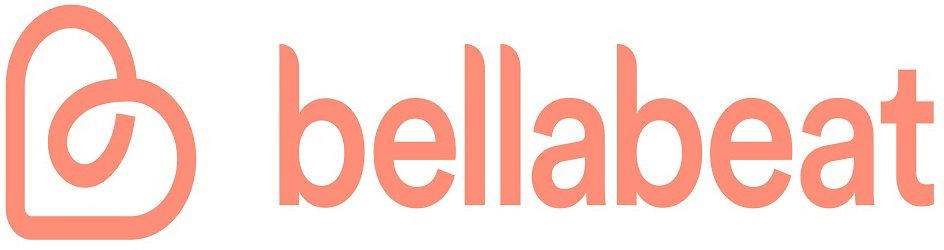

# Introduction

This is a Capstone Project for the Google Data Analytics Certification. The case study involves Bellabeat, a high-tech manufacturer of health focused products for women. These products which are mainly smart devices are used to monitor health vitals of the user. The dataset can be gotten [here](https://www.kaggle.com/arashnic/fitbit).

Bellabet is looking to expanding their business and would like to receive data-driven recommendations to improve marketing strategy. In other to perform this task, a comprehensive analysis on Smart device usage data is required.

## Methodology

I would be adopting the Data Analysis Process for this case study.
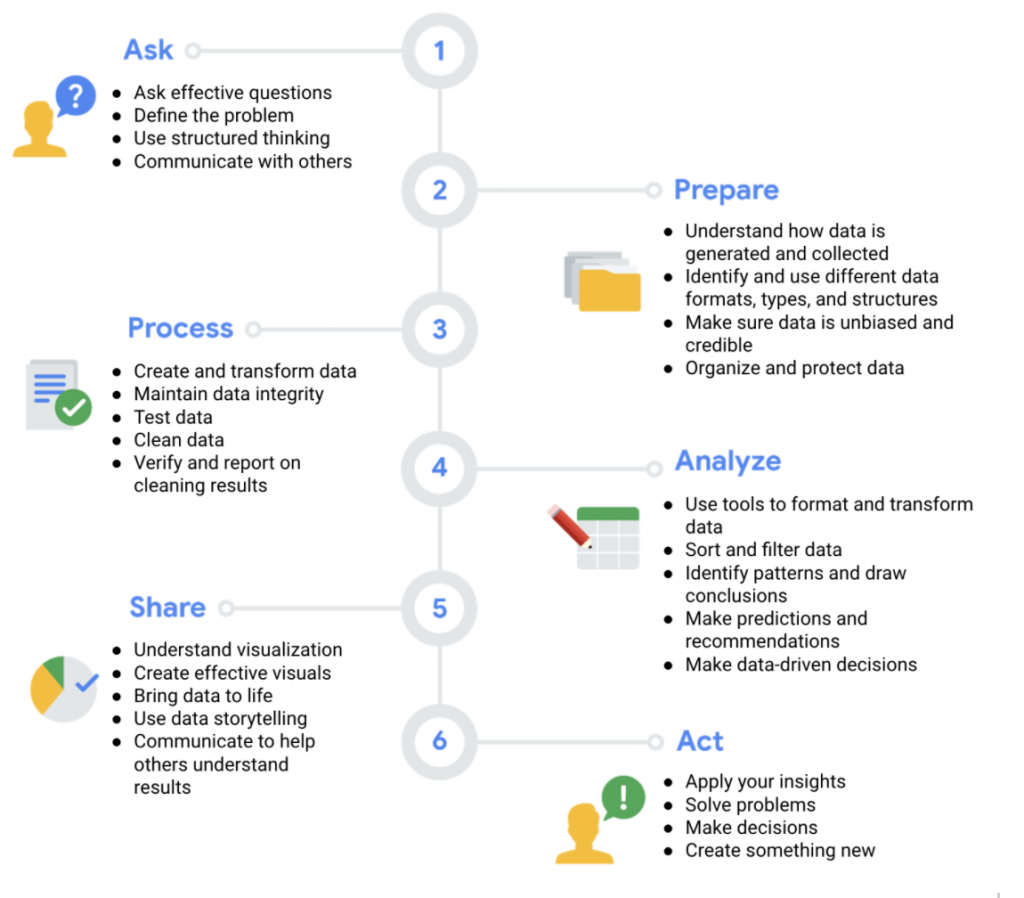

# Ask

I was tasked to analyze the smart device usage data in order to gain insights on how customers use their smart devices. These questions would serve as a guide during our analysis:

-   What are some trends in smart device usage?

-   How could these trends apply to Bellabeat customers?

-   How could these trends help influence Bellabeat marketing strategy?

## Business Task

Identifying potential opportunities for growth and recommendations for the Bellabeat marketing strategy based on trends in smart device usage.

# Process

### Loading packages

These packages would be used to clean, manipulate, analyze and visualize data

In [1]:
#loading the required packages
    library(tidyverse)
    library(lubridate)
    library(readr)
    library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Importing Datasets

Importing the datasets to be considered in this analysis

In [2]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv") 

   
    hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

    hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
    
    hourly_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

    sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
    
    weight_log_info<- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet t

To check if the dataset imported correctly using the head() function

In [3]:
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728



### Merging,Renaming and Removing datasets

I noticed certain datasets could be grouped into one, either by day, hour or minutes the data was recorded with. I merged the activities into these groups and removed the redundant datasets.

In [4]:
hourly_activity<-merge(x=hourly_calories, y=hourly_intensities, by=c("Id","ActivityHour"))
hourly_activity<-merge(x=hourly_activity, y=hourly_steps, by =c("Id","ActivityHour"))
rm(hourly_calories,hourly_steps,hourly_intensities)

sleep_day<- rename(sleep_day, ActivityDate=SleepDay)

### Fixing datatype

Upon inspection I noticed that the day/time formats were in the *VARCHAR* format instead of the *DATE* or *DATETIME* formats.

In [5]:
daily_activity$ActivityDate<- as.POSIXct(daily_activity$ActivityDate, format= "%m/%d/%Y")
hourly_activity$ActivityHour<- as.POSIXct(hourly_activity$ActivityHour, format= "%m/%d/%Y %I:%M:%S %p")
hourly_activity$ActivityTime<-format(hourly_activity$ActivityHour, format= "%H:%M:%S")
hourly_activity$ActivityDate<- format(hourly_activity$ActivityHour, format= "%m/%d/%y")
sleep_day$ActivityDate<-as.POSIXct(sleep_day$ActivityDate, format= "%m/%d/%Y %I:%M:%S %p")

### Assigning Days of the week to the datasets

I would be assigning a Days column to help with my analysis. I do believe it would provide a great insight as it would be helpful to analyse activities by each day of the week to help see patterns or trends.

In [6]:
daily_activity<-transform(daily_activity,Day_of_the_week=weekdays(ActivityDate))
 hourly_activity<-transform(hourly_activity,Day_of_the_week=weekdays(ActivityHour))
 sleep_day<-transform(sleep_day,Day_of_the_week=weekdays(ActivityDate))


# Analyze

### **Exploring and Summarizing Data**

Checking the number of users for each dataset to make sure the data is consistent.

In [7]:
n_distinct(daily_activity$Id)
n_distinct(hourly_activity$Id)
n_distinct(sleep_day$Id)
n_distinct(weight_log_info$Id)

[1] 33

[1] 33

[1] 24

[1] 8

-   From the results, I can see there are 33 users contradicting the fact that the company stated it recorded only 30 users data. This could mean that a couple of users had multiple registrations. Although there isn't enough data to completely validate our claims, hence I would proceed with the 33 users.

-   Also I noticed that the weight_log_info dataset has only 8 user's data which makes up just **24.2%** of all users, compared to our 33 user data I would not be able to make proper data-driven analysis due to lack of data.

Merging sleep day with daily activities. There would be n/a values due to the data inconsistencies as the sleep_day dataset consists of 24 users and the daily_activity dataset consists of 33 users. So we merge both dataset together using inner join

In [8]:
daily_sleep_merged<-merge(x=daily_activity,y=sleep_day, by=c("Id","ActivityDate"))

#### **Getting the average for multiple activities**

In [9]:
summary_activity<- daily_activity %>%
  summarise_at(c(avg_steps="TotalSteps",avg_distance="TotalDistance",avg_sedentary_mins="SedentaryMinutes",avg_calories="Calories",avg_active_mins="VeryActiveMinutes"),mean)
summary_activity
#Average per weekday
summary_weekly<-daily_activity%>%
  group_by (Day_of_the_week)%>%
  summarise_at(c(avg_steps="TotalSteps",avg_distance="TotalDistance",avg_sedentary_mins="SedentaryMinutes",avg_calories="Calories",avg_active_mins="VeryActiveMinutes"),mean)
summary_weekly

avg_steps,avg_distance,avg_sedentary_mins,avg_calories,avg_active_mins
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7637.911,5.489702,991.2106,2303.61,21.16489


Day_of_the_week,avg_steps,avg_distance,avg_sedentary_mins,avg_calories,avg_active_mins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Friday,7448.230,5.309921,1000.3095,2331.786,20.05556
Monday,7780.867,5.552917,1027.9417,2324.208,23.10833
Saturday,8152.976,5.854677,964.2823,2354.968,21.91935
Sunday,6933.231,5.027190,990.2562,2263.000,19.98347
Thursday,7405.837,5.312245,961.9932,2199.571,19.40816
Tuesday,8125.007,5.832237,1007.3618,2356.013,22.95395
Wednesday,7559.373,5.488333,989.4800,2302.620,20.78000


-   Users walk more on Saturdays **8,152** steps.This could be due to the fact that most users are workers or students and have Saturdays for exercises.
-   On Tuesdays, users take about **8,125** steps and expend more calories than on Saturdays! More data would be required to produce better insights.
-   From the results, the average steps for all users is **7,637** steps which is below the recommended steps of 10,000 according to CDC(Centers for Disease Control and Prevention).
-   Also, despite Sunday having the lowest average steps taken in a day with **6,933** steps the amount of calories expended is higher than Thursday with **7,405** steps. This shows us that users should not only increase their steps but their very active minutes daily if they plan on increasing the amount of calories burnt per day.

Checking the number of times users took 10,000 steps or more a day


In [10]:
recommended_activity<-filter(daily_activity, TotalSteps >10000)
count(recommended_activity)

n
<int>
303


#### **Average sleep minutes and time in bed**

I would like to find out users sleep patterns for each day of the week

In [11]:
summary_sleep<- sleep_day%>%
  group_by(Day_of_the_week)%>%
  summarise_at(c(avg_mins_asleep="TotalMinutesAsleep", avg_mins_in_bed="TotalTimeInBed"), mean)
summary_sleep
#Average sleep time for users
sleep_day%>%
  summarise_at(c(avg_mins_asleep="TotalMinutesAsleep", avg_mins_in_bed="TotalTimeInBed"), mean)

Day_of_the_week,avg_mins_asleep,avg_mins_in_bed
<chr>,<dbl>,<dbl>
Friday,405.4211,445.0526
Monday,418.8298,456.1702
Saturday,420.8103,461.2759
Sunday,452.7455,503.5091
Thursday,402.3692,435.8000
Tuesday,404.5385,443.2923
Wednesday,434.6818,470.0303


avg_mins_asleep,avg_mins_in_bed
<dbl>,<dbl>
419.4673,458.6392


-   Users tend to sleep more on weekends particularly on **Sunday(7.5 hours)**. This could be as a result of users working on weekdays and having early/late shifts.

-   Users have an average sleep time of about **7 hours** and according to the CDC, adults of ages 18-60 years are required to sleep for 7 or more hours per night.

#### **Average Intensity, Steps and Calories Per Hour**

In [12]:
summary_hour <- hourly_activity %>%
  group_by(ActivityTime) %>%
  drop_na() %>%
  summarise_at(c(avg_total_int = "TotalIntensity", avg_stepstotal="StepTotal", avg_calories="Calories"),mean)
hourly_activity %>%
  drop_na() %>%
  summarise_at(c(avg_total_int = "TotalIntensity", avg_stepstotal="StepTotal", avg_calories="Calories"),mean)

avg_total_int,avg_stepstotal,avg_calories
<dbl>,<dbl>,<dbl>
12.03534,320.1663,97.38676


#### **Correlation**

I decided to use Pearson's correlation to identify how variables correlated with other variables and ultimately identify trends to help with my analysis.

First I would select the quantitative data out and create a new data frame to check the correlation between the variables

In [13]:
testing<-select(daily_activity, Calories, TotalSteps:SedentaryMinutes, -Day_of_the_week)

Checking the correlation,

In [14]:
correlation_daily<-cor(testing)
head(correlation_daily)

,Calories,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
Calories,1.0000000,0.5915681,0.6449619,0.6453133,0.2075951,0.4919586,0.21678987,0.4669168,0.04365187,0.6158383,0.29762347,0.28671753,-0.10697305
TotalSteps,0.5915681,1.0000000,0.9853688,0.9848222,0.1818487,0.7401146,0.50710545,0.6922082,0.07050474,0.6670787,0.49869337,0.56960021,-0.32748355
TotalDistance,0.6449619,0.9853688,1.0000000,0.9995047,0.1883318,0.7945816,0.47075827,0.6620015,0.08238905,0.6812974,0.46289889,0.51630049,-0.28809436
TrackerDistance,0.6453133,0.9848222,0.9995047,1.0000000,0.1625853,0.7943381,0.47027739,0.6613648,0.07459089,0.6808160,0.46315415,0.51471308,-0.28934322
LoggedActivitiesDistance,0.2075951,0.1818487,0.1883318,0.1625853,1.0000000,0.1508523,0.07652693,0.1383015,0.15499618,0.2344429,0.05385996,0.10213494,-0.04699945
VeryActiveDistance,0.4919586,0.7401146,0.7945816,0.7943381,0.1508523,1.0000000,0.19298587,0.1576693,0.04611675,0.8266815,0.21173011,0.05984538,-0.06175419


-   From the correlation result, we can see multiple variables(such as Total Steps, Total Distance, Very Active Minutes, e.t.c) all have positive correlation with calories.

-   I can also deduce that sedentary minutes has no correlation with calories expended.

# Share

### Visualization

I would visualize our findings to clearly see some correlation, patterns and trends.

For the visualizations that involves day of the week, I would want to make sure it is arranged according to the week days and not alphabetically.

In [15]:
summary_sleep<-mutate(summary_sleep, Day_of_the_week= factor(Day_of_the_week, levels = c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")))
daily_activity<- mutate(daily_activity, Day_of_the_week=factor(Day_of_the_week, levels = c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")))
summary_weekly<-mutate(summary_weekly, Day_of_the_week= factor(Day_of_the_week, levels = c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")))

Now we can visualize our data;

-   I would visualize the number of Total steps taken by the Calories expended to see the positive correlation(strong).

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



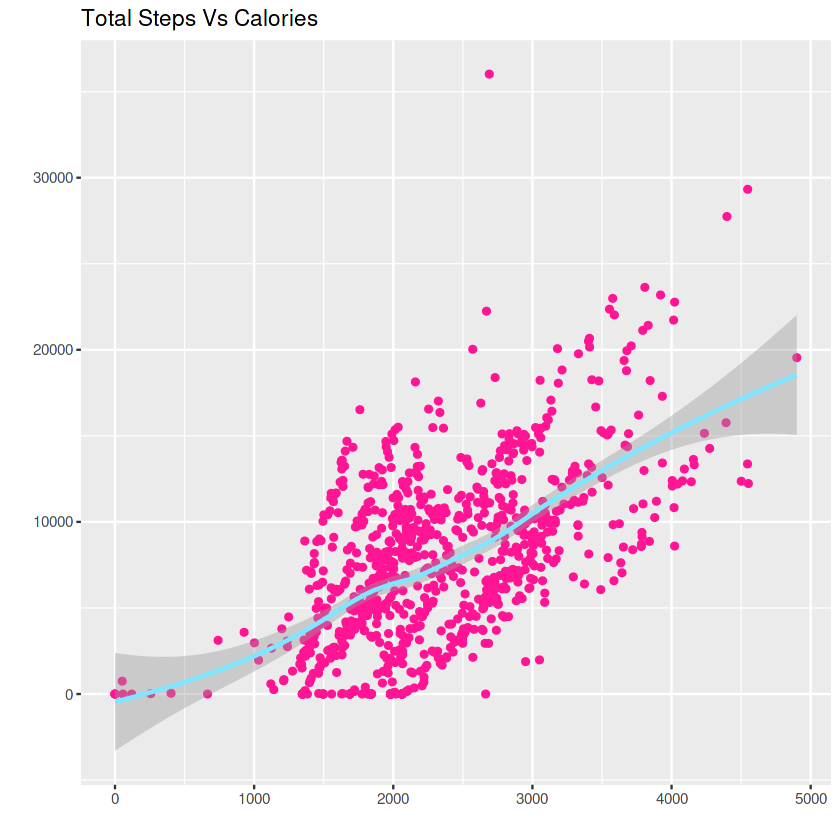

In [16]:
ggplot(daily_activity, aes(x=Calories,y=TotalSteps))+geom_point(color="#FF1493")+geom_smooth(color="#80e5ff") + labs(title = "Total Steps Vs Calories", x="",y="")

-   Visualizing the positive correlation between very active minutes and calories expended.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



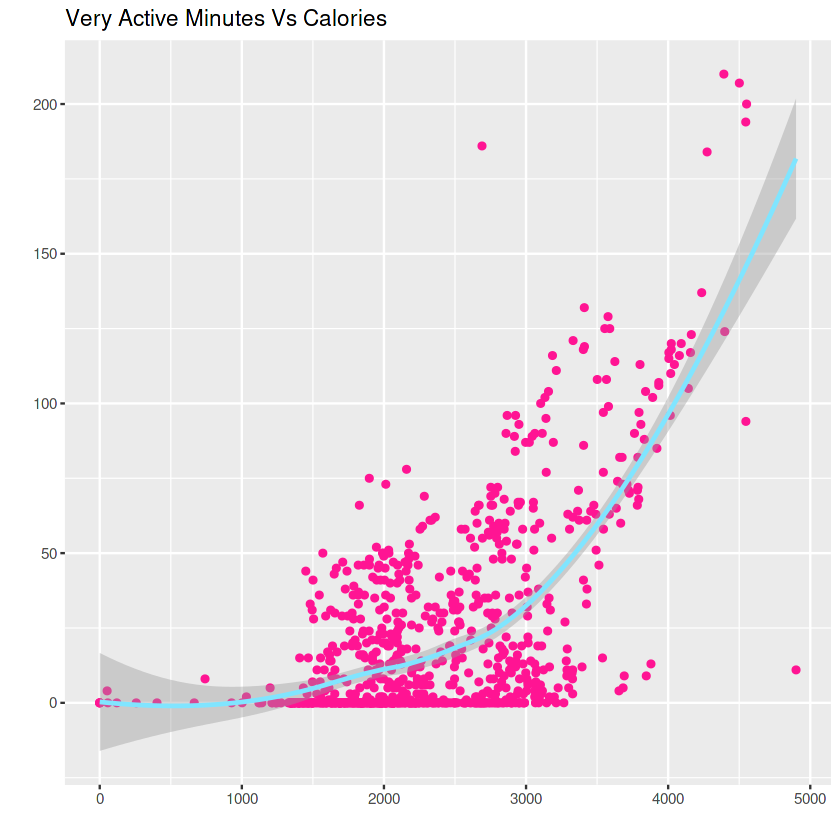

In [17]:
ggplot(daily_activity, aes(x=Calories,y=VeryActiveMinutes))+geom_point(color="#FF1493")+geom_smooth(color="#80e5ff") + labs(title = "Very Active Minutes Vs Calories", x="",y="")

-   Visualizing the total distance by calories for each day of the week

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



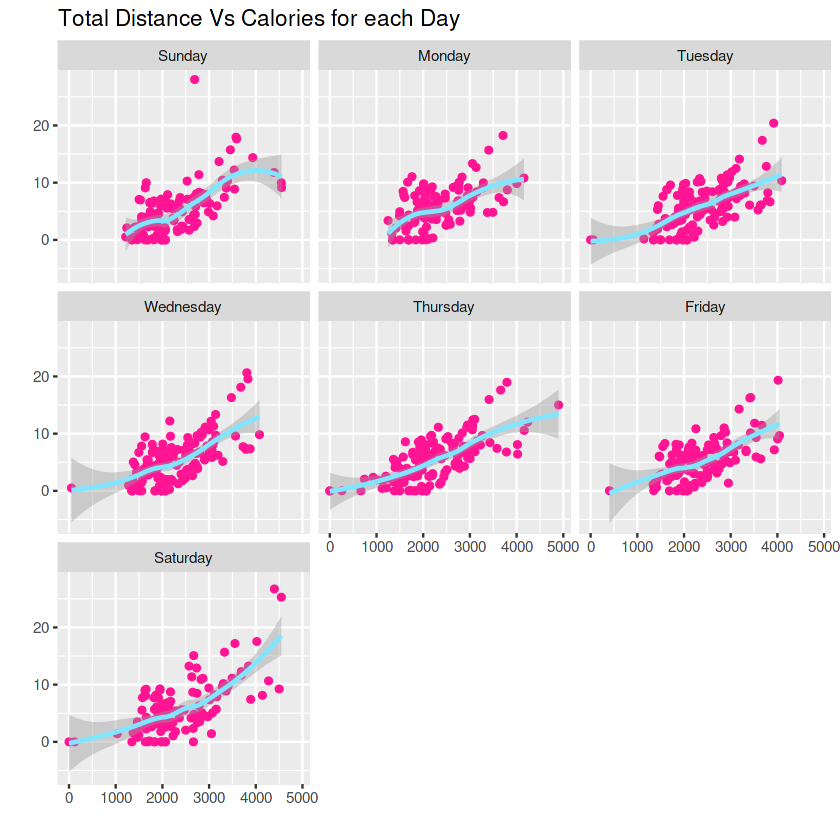

In [18]:
ggplot(daily_activity, aes(x=Calories,y=TotalDistance))+geom_point(color="#FF1493")+geom_smooth(color="#80e5ff") +facet_wrap (~Day_of_the_week) +labs(title = "Total Distance Vs Calories for each Day", x="",y="")

-   Visualizing the correlation between time spent in bed and the minute asleep

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



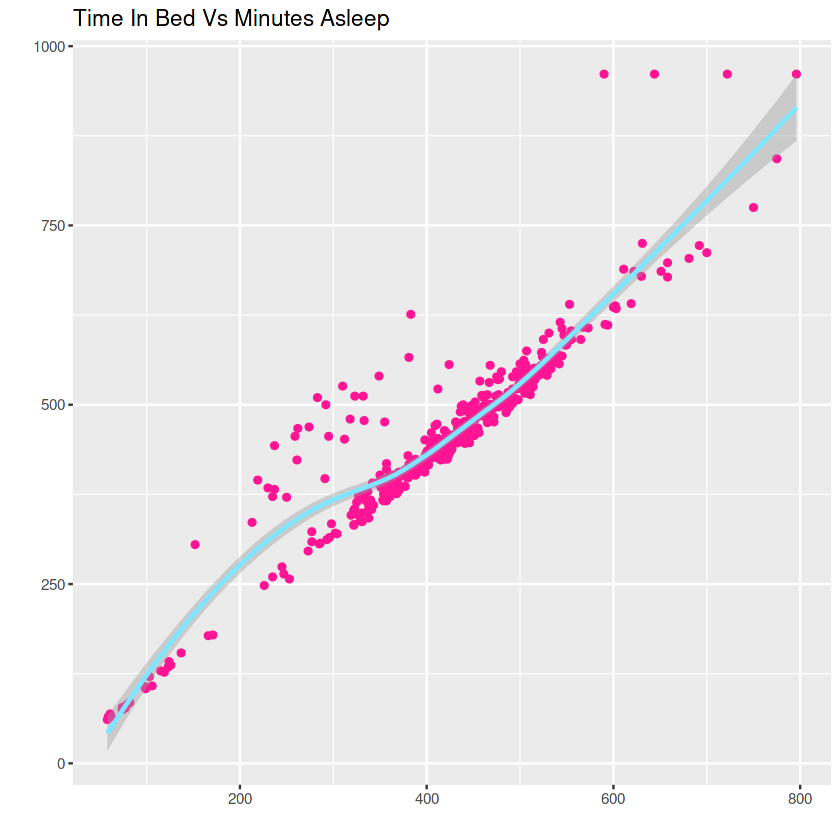

In [19]:
ggplot(sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + geom_point(color="#FF1493")+ geom_smooth(color="#80e5ff") +labs(title = "Time In Bed Vs Minutes Asleep", x="",y="")

#We see that there are positively correlated(strong) so 91.46% of the time, users stay in bed to sleep.

-   Visualizing the number of steps taken by the minutes spent asleep

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



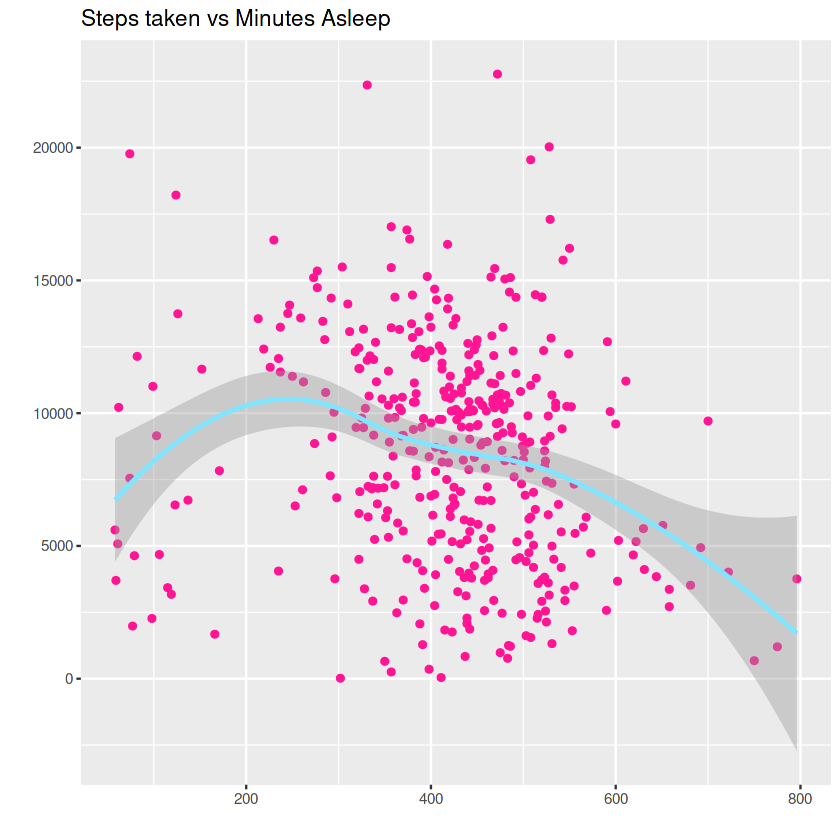

In [20]:
ggplot(daily_sleep_merged, aes(x=TotalMinutesAsleep, y=TotalSteps)) + geom_point(color="#FF1493") + geom_smooth(color="#80e5ff") + labs(title = "Steps taken vs Minutes Asleep", x="", y="")

-   Visualizing the average total intensity per hour

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


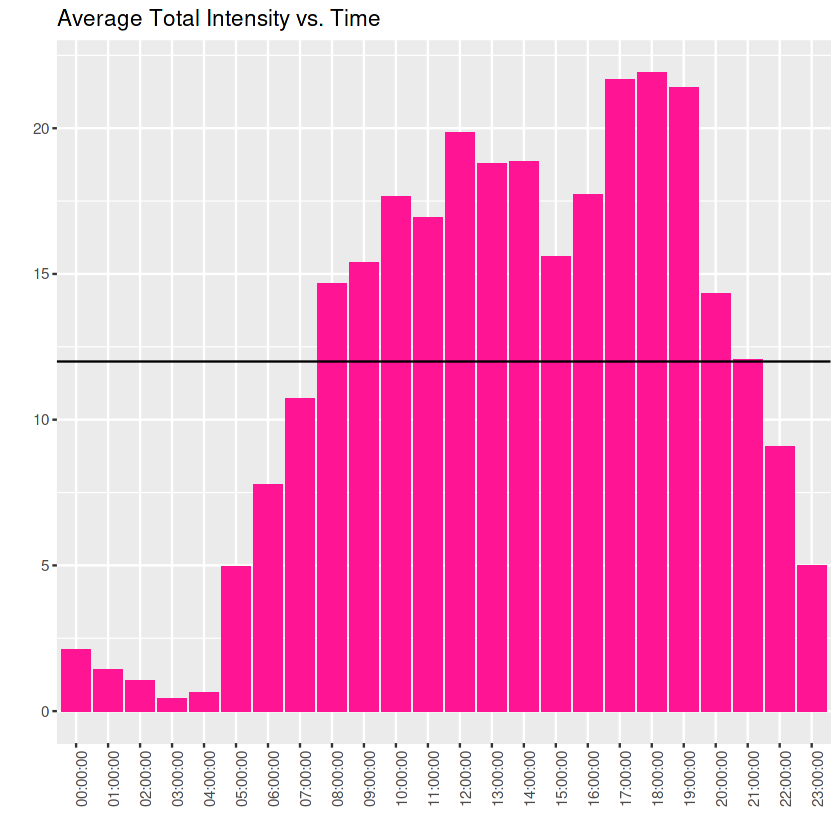

In [21]:
ggplot(data=summary_hour, aes(x=ActivityTime, y=avg_total_int)) + geom_histogram(stat = "identity", fill="#FF1493")+ geom_hline(yintercept = 12) + theme(axis.text.x = element_text(angle = 90)) +
labs(title="Average Total Intensity vs. Time", x="",y="")

From the visualization, users are more active from 8am till 9pm.

Most activity occurs between **5pm and 7pm**. This could be due to the fact that users go to the gym for exercises or a jog after work hours.

-   Visualizing the average time asleep and total distance for each day of the week.

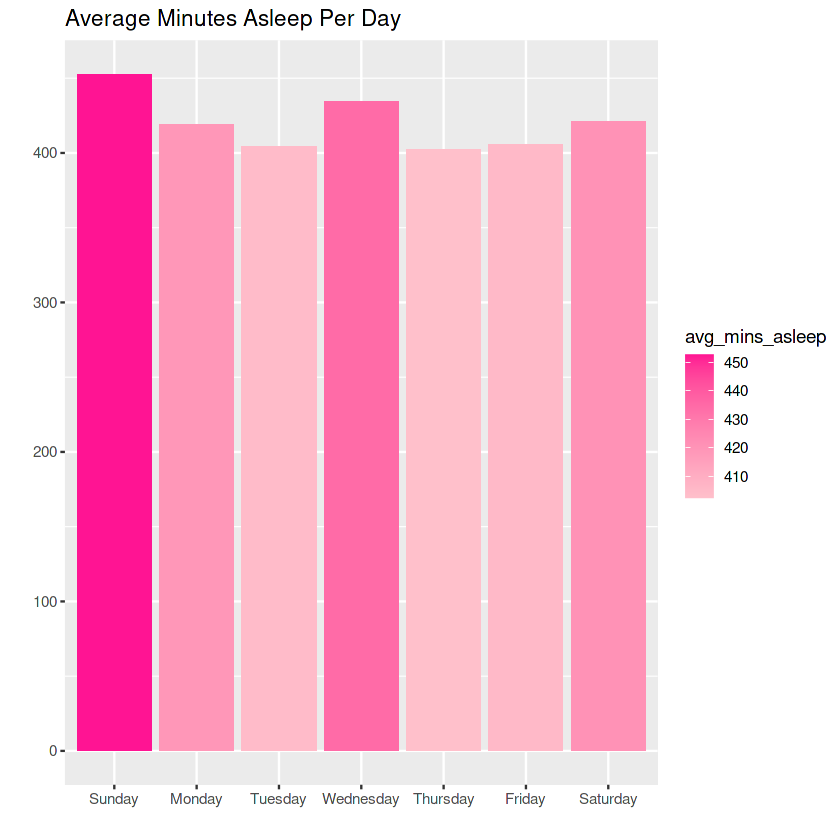

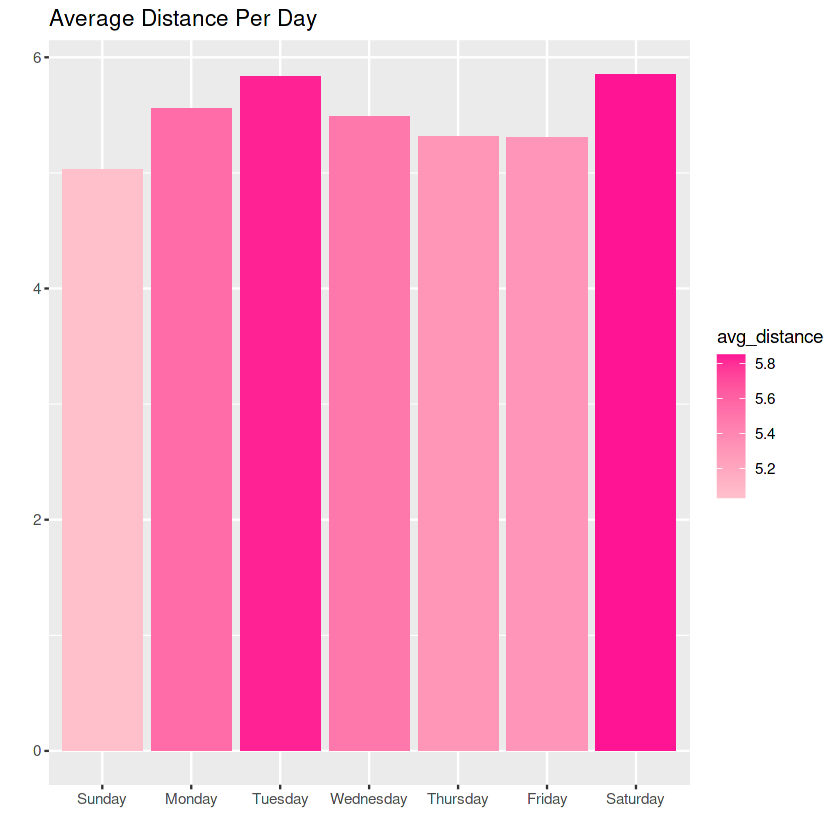

In [22]:
#average time asleep for each day of the week
ggplot(data=summary_sleep, aes(x=Day_of_the_week, y=avg_mins_asleep, fill=avg_mins_asleep)) + geom_bar(stat = "identity") + scale_fill_gradient(low = "#FFC0CB", high="#FF1493") +labs(title = "Average Minutes Asleep Per Day", x="",y="")
#average distance for each day of the week
ggplot(data = summary_weekly, aes(x=Day_of_the_week, y=avg_distance, fill=avg_distance)) + geom_bar(stat="identity") + scale_fill_gradient(low = "#FFC0CB", high="#FF1493") + labs(title = "Average Distance Per Day", x="",y="")

# Key Insights

-   According to the CDC, individuals are required to walk about 10,000 steps a day, that's about 8km. In our dataset the average steps taken a day is 7637 which is 76.38% of the recommended amount. Users took 10,000 steps or more **32.2%** of the time.

-   Users who have high very active minutes also expend more calories. This means that users that are looking forward to burning calories increase their workout time to achieve their goals.

-   There is no correlation stating that people who sleep more walk more. Users sleep patterns have no effect on the total steps taken daily.

# Limitations

-   I was not able to properly determine if very active minutes correlates to user's heart rate. The data provided for the heartrate_seconds_merged dataset was incomplete as only 14 users data was recorded. About **58%** of the users in this dataset were not included.
-   The data is biased as the company is a global company but only 30 users data were provided which is not a proper sample size to make a data-driven analysis. Also the data is not current as the company was founded in 2013 and the data provided was for a duration of one month in 2016, and the analysis was conducted in 2022.
-   The insights gained from this analysis is to be used to recommend marketing strategy for a smart device company for women but the data provided did not specify what gender the users are. This could lead to wrong analysis and predictions.

# Recommendations

After conducting my analysis on the FitBit Fitness Tracker Data, I came up with recommendations that would help influence Bellabeat marketing strategy.

-   **Gather Data:** More data should be recorded and provided to accurately make more informed analysis and also data-driven decisions.
-   **Tasks and Setting Goals:** Upon registration, each user should state what they are hoping to achieve using the app and their schedule. This would enable the app to recommend daily tasks and display completion rates for each user every day.
-   **Reward Scheme:** A reward scheme system should be adopted to reward customers who are committed in completing their daily tasks. This would encourage users to participate and complete daily tasks and ultimately walk more daily.
-   **Addition of more features:** The device should include more features like a call/text to your emergency contact in cases of sudden increase in heart rate and other health vitals. This would enable users feel safe and keep the device on for longer period of time. Also users should be encouraged to share their journey and records on various social platforms.
